# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import re
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import re
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures


# Funciones 

### Remplazar Nulos

In [7]:
def reemplazar_nulos(dataframe, estrategia, columnas):

  if(estrategia in ['mean', 'median', 'most_frequent']):
    imputer = SimpleImputer(missing_values = np.nan, strategy = estrategia)
    imputer. fit(dataframe[columnas])

    dataframe[columnas] = imputer.transform(dataframe[columnas])
  else:
    raise Exception("Estrategia Invalida")



def reemplazar_nulos_constante(dataframe, columnas, constante):

    imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value= constante)
    imputer. fit(dataframe[columnas])

    dataframe[columnas] = imputer.transform(dataframe[columnas])


### Graficar matriz de correlacion

In [8]:
def correlacion_matrix(data, column, porcentajeCorrelacion):
  corr_matrix = data.corr()

  top_corr_features = corr_matrix.index[abs(corr_matrix[column]) >= porcentajeCorrelacion]


  plt.figure(figsize=(10, 6))
  sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="coolwarm")

  plt.title(f'Matriz de Correlación de las Variables mas correlacionadas con {column}')
  plt.show()

# Load Dataset

In [9]:
dataDirectory = '../data/Number_of_Cancer_Cases_for_All_Cancer_Sites_by_Jurisdiction__Gender__and_Race__Maryland_2009.csv'
data = pd.read_csv(dataDirectory)

In [10]:
data.head()

,Jurisdiction,Total,Males,Females,Whites,Blacks,Other Race,Unknown Race
0,Maryland,26800,13346,13413,18912,6557.0,1081.0,250.0
1,Allegany,518,254,263,503,NaN,NaN,0.0
2,Anne Arundel,2589,1342,1241,2204,311.0,59.0,15.0
3,Baltimore City,3048,1512,1533,1094,1898.0,41.0,15.0
4,Baltimore County,4369,2081,2285,3502,741.0,109.0,17.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Jurisdiction  26 non-null     object 
 1   Total         26 non-null     int64  
 2   Males         26 non-null     int64  
 3   Females       26 non-null     int64  
 4   Whites        26 non-null     int64  
 5   Blacks        20 non-null     float64
 6   Other Race    12 non-null     float64
 7   Unknown Race  16 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.8+ KB


Reemplazamos los NaN con 0 ya que lo tomaremos como si no hubiera datos de estas razas en esa jurisdiccion

In [12]:
columnas = data.columns.tolist()

reemplazar_nulos_constante(data, columnas, 0)

In [13]:
data.head()

,Jurisdiction,Total,Males,Females,Whites,Blacks,Other Race,Unknown Race
0,Maryland,26800,13346,13413,18912,6557.0,1081.0,250.0
1,Allegany,518,254,263,503,0,0,0.0
2,Anne Arundel,2589,1342,1241,2204,311.0,59.0,15.0
3,Baltimore City,3048,1512,1533,1094,1898.0,41.0,15.0
4,Baltimore County,4369,2081,2285,3502,741.0,109.0,17.0


Eliminamos Jurisdiccion para quedarnos solo con las varibles numericas

In [14]:
datav1 = data.drop('Jurisdiction', axis=1)


In [15]:
datav1.head()

,Total,Males,Females,Whites,Blacks,Other Race,Unknown Race
0,26800,13346,13413,18912,6557.0,1081.0,250.0
1,518,254,263,503,0,0,0.0
2,2589,1342,1241,2204,311.0,59.0,15.0
3,3048,1512,1533,1094,1898.0,41.0,15.0
4,4369,2081,2285,3502,741.0,109.0,17.0


Convertirmos todo el data frame a enteros

In [16]:
datav1 = datav1.astype(int) 


In [17]:
datav1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Total         26 non-null     int32
 1   Males         26 non-null     int32
 2   Females       26 non-null     int32
 3   Whites        26 non-null     int32
 4   Blacks        26 non-null     int32
 5   Other Race    26 non-null     int32
 6   Unknown Race  26 non-null     int32
dtypes: int32(7)
memory usage: 856.0 bytes


## Matrix de Correlacion

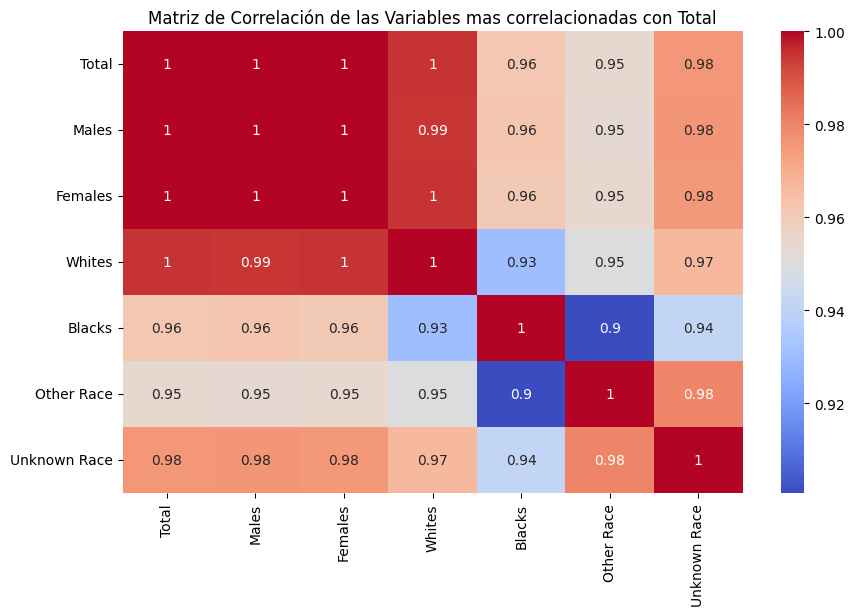

In [18]:
correlacion_matrix(datav1, 'Total', 0)

## Analisis Tabla de Contingencia

Número de Casos de Cáncer por Raza en Cada Jurisdicción (Excluyendo Maryland El Total)

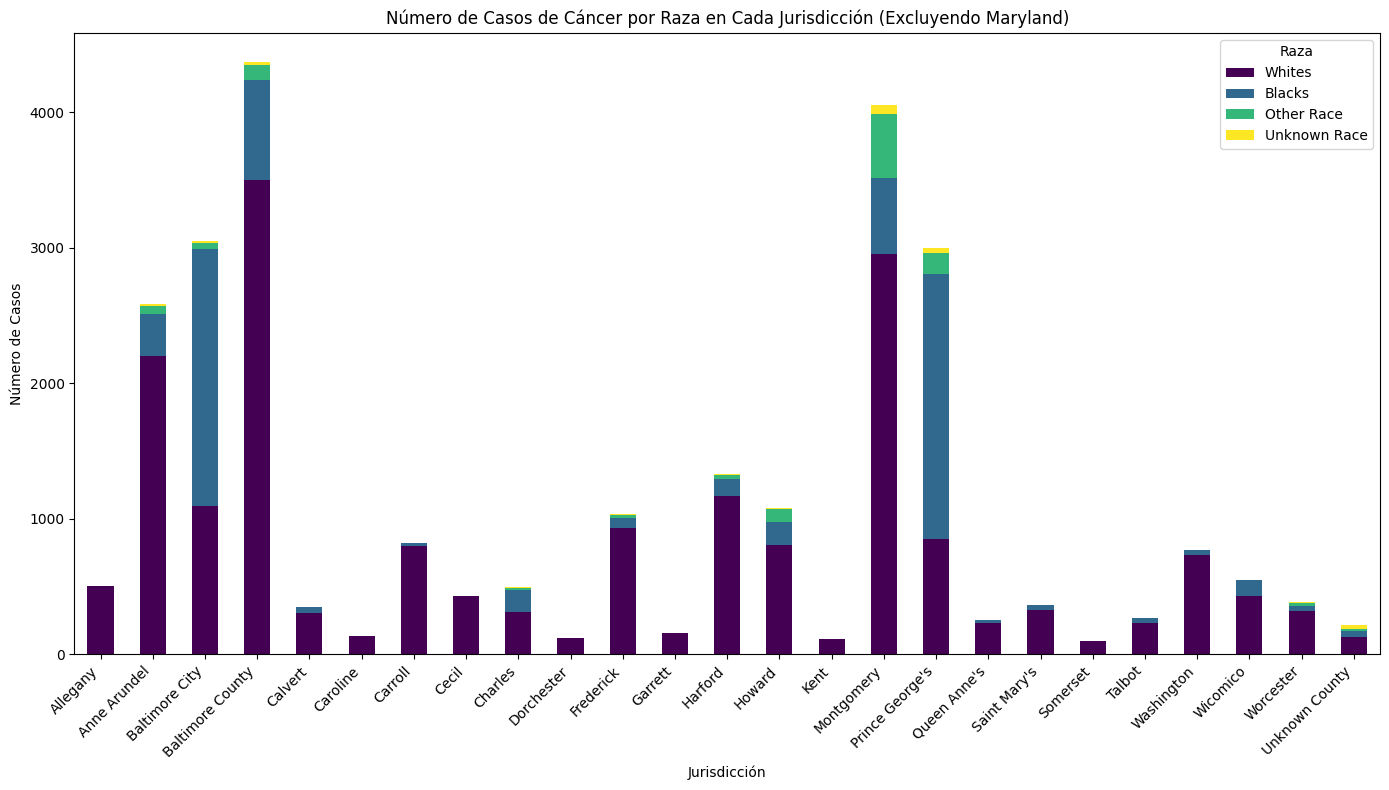

In [23]:
data_without_maryland = data[data['Jurisdiction'] != 'Maryland']

columns_to_display = ['Jurisdiction', 'Whites', 'Blacks', 'Other Race', 'Unknown Race']
data_for_plot = data_without_maryland[columns_to_display]

data_for_plot.set_index('Jurisdiction', inplace=True)
data_for_plot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

plt.title('Número de Casos de Cáncer por Raza en Cada Jurisdicción (Excluyendo Maryland)')
plt.xlabel('Jurisdicción')
plt.ylabel('Número de Casos')
plt.legend(title='Raza')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Distribución de Casos de Cáncer por Raza en Cada Jurisdicción

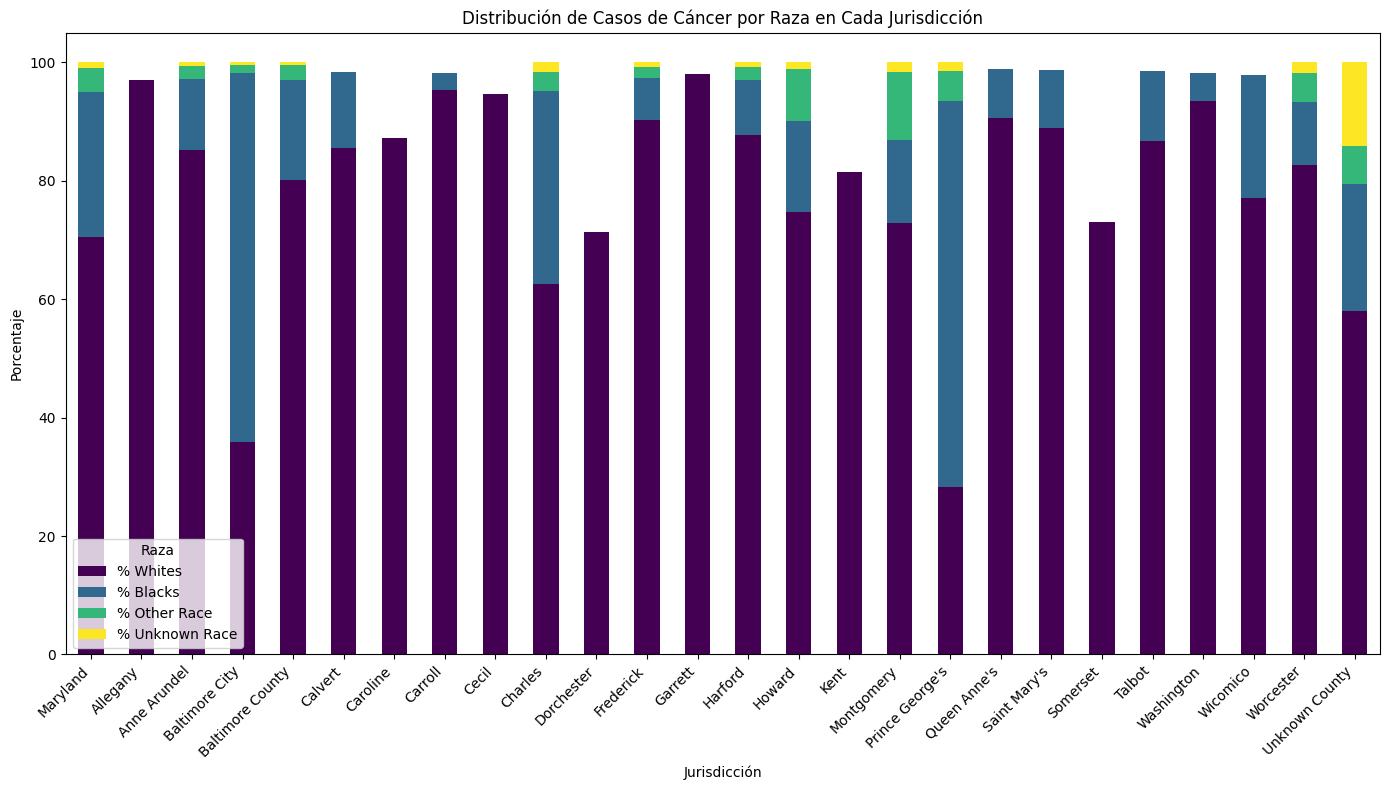

In [21]:
data[['Total', 'Whites', 'Blacks', 'Other Race', 'Unknown Race']] = data[['Total', 'Whites', 'Blacks', 'Other Race', 'Unknown Race']].apply(pd.to_numeric)

# Ahora, calculamos los porcentajes por raza para cada jurisdicción
data['% Whites'] = (data['Whites'] / data['Total']) * 100
data['% Blacks'] = (data['Blacks'] / data['Total']) * 100
data['% Other Race'] = (data['Other Race'] / data['Total']) * 100
data['% Unknown Race'] = (data['Unknown Race'] / data['Total']) * 100

# Seleccionamos solo las columnas relevantes para el gráfico
data_for_plot = data[['Jurisdiction', '% Whites', '% Blacks', '% Other Race', '% Unknown Race']]

# Configuramos el gráfico
data_for_plot.set_index('Jurisdiction', inplace=True)
data_for_plot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Añadimos títulos y etiquetas
plt.title('Distribución de Casos de Cáncer por Raza en Cada Jurisdicción')
plt.xlabel('Jurisdicción')
plt.ylabel('Porcentaje')
plt.legend(title='Raza')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostramos el gráfico
plt.show()

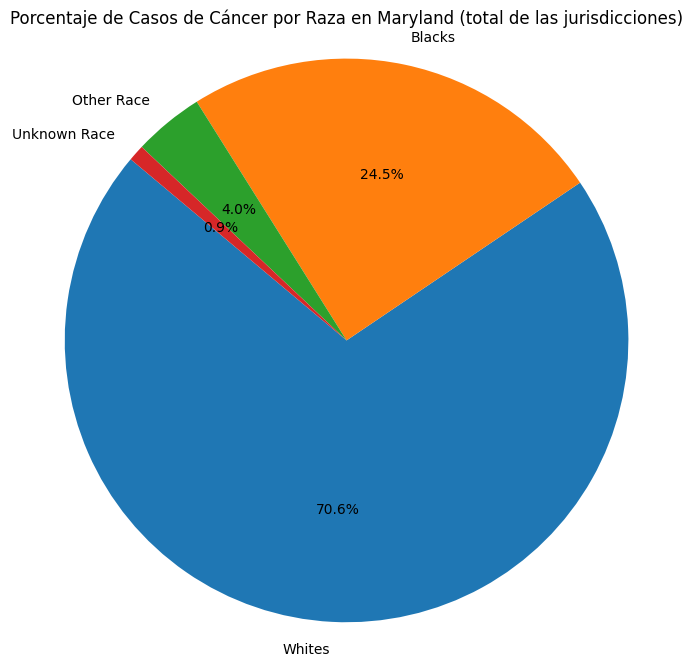

In [37]:
maryland_data = data[data['Jurisdiction'] == 'Maryland'].iloc[:, 4:8]

maryland_data = maryland_data.apply(pd.to_numeric)


race_labels = maryland_data.columns


race_values = maryland_data.values.flatten()

plt.figure(figsize=(8, 8))
plt.pie(race_values, labels=race_labels, autopct='%1.1f%%', startangle=140)

plt.title('Porcentaje de Casos de Cáncer por Raza en Maryland (total de las jurisdicciones)')

plt.axis('equal')  
plt.show()

Porcentaje de Casos de Cáncer entre Hombres y Mujeres por Jurisdicción

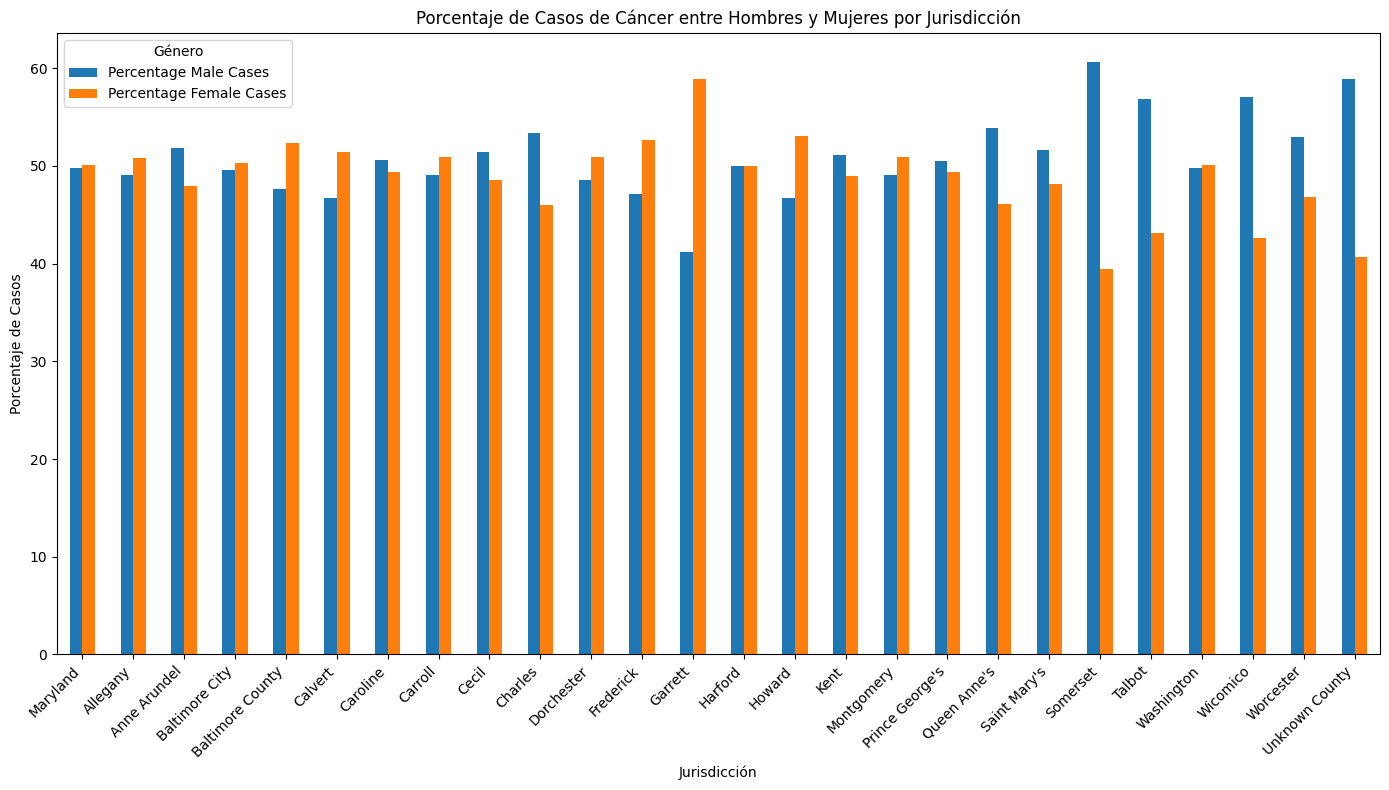

In [24]:
# Calcular el porcentaje de casos de cáncer por género para cada jurisdicción
data['Percentage Male Cases'] = (data['Males'] / data['Total']) * 100
data['Percentage Female Cases'] = (data['Females'] / data['Total']) * 100

# Seleccionar las columnas relevantes para el gráfico
gender_percentage_data = data[['Jurisdiction', 'Percentage Male Cases', 'Percentage Female Cases']]

# Configurar el índice del DataFrame para el gráfico
gender_percentage_data.set_index('Jurisdiction', inplace=True)

# Crear el gráfico de barras
gender_percentage_data.plot(kind='bar', figsize=(14, 8))

# Configurar título y etiquetas
plt.title('Porcentaje de Casos de Cáncer entre Hombres y Mujeres por Jurisdicción')
plt.xlabel('Jurisdicción')
plt.ylabel('Porcentaje de Casos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género')
plt.tight_layout()

plt.show()

# Pruebas Chi Cuadrado

In [26]:
columns_for_chi2 = ['Whites', 'Blacks', 'Other Race', 'Unknown Race']

chi2, p, dof, expected  = chi2_contingency(data[columns_for_chi2])

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Hay evidencia suficiente para sugerir que hay una relación en la raza en la prevalencia de cáncer.")
else:
    print("No hay suficiente evidencia para sugerir que hay una relación en la raza en la prevalencia de cáncer.")

Chi-square statistic: 8852.652201335219
P-value: 0.0
Hay evidencia suficiente para sugerir que hay una relación entre género y raza en la prevalencia de cáncer.


In [34]:
columns_for_chi2 = ['Males', 'Females']

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(data[columns_for_chi2])

# Imprimir los resultados
print(f"Estadístico de Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

# Interpretar los resultados
if p < 0.05:
    print("Hay evidencia suficiente para sugerir que hay una relación entre los géneros y la prevalencia de cáncer.")
else:
    print("No hay suficiente evidencia para sugerir que hay una relación entre los géneros y la prevalencia de cáncer.")

Estadístico de Chi-cuadrado: 65.94595738296971
Valor p: 1.5114643704946133e-05
Hay evidencia suficiente para sugerir que hay una relación entre los géneros y la prevalencia de cáncer.


In [38]:

columns_for_chi2 = ['Males','Females','Whites', 'Blacks', 'Other Race', 'Unknown Race']


chi2, p, dof, expected = chi2_contingency(data[columns_for_chi2])


print(f"Estadístico de Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

if p < 0.05:
    print("Hay evidencia suficiente para sugerir que hay una relación entre la raza y el género en la prevalencia de cáncer.")
else:
    print("No hay suficiente evidencia para sugerir que hay una relación entre la raza y el género en la prevalencia de cáncer.")

Estadístico de Chi-cuadrado: 8918.951247644723
Valor p: 0.0
Hay evidencia suficiente para sugerir que hay una relación entre la raza y el género en la prevalencia de cáncer.


In [40]:
# Definir las combinaciones de género y raza, incluyendo todas las razas y géneros
combinations = [('Males', 'Whites'), ('Females', 'Whites'), ('Males', 'Blacks'), ('Females', 'Blacks'), 
                ('Males', 'Other Race'), ('Females', 'Other Race'), ('Males', 'Unknown Race'), ('Females', 'Unknown Race')]

# Realizar las pruebas de chi-cuadrado para cada combinación
for gender, race in combinations:
    # Seleccionar las columnas relevantes para la combinación
    columns_for_chi2 = [gender, race]

    # Realizar la prueba de chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(data[columns_for_chi2])

    # Imprimir los resultados
    print(f"Chi-cuadrado para {gender} y {race}:")
    print(f"Estadístico de Chi-cuadrado: {chi2}")
    print(f"Valor p: {p}")

    # Interpretar los resultados
    if p < 0.05:
        print("Hay evidencia suficiente para sugerir una relación entre {} y {} en la prevalencia de cáncer.".format(gender, race))
    else:
        print("No hay suficiente evidencia para sugerir una relación entre {} y {} en la prevalencia de cáncer.".format(gender, race))
    print()

Chi-cuadrado para Males y Whites:
Estadístico de Chi-cuadrado: 1036.292631265235
Valor p: 1.1524483444347616e-202
Hay evidencia suficiente para sugerir una relación entre Males y Whites en la prevalencia de cáncer.

Chi-cuadrado para Females y Whites:
Estadístico de Chi-cuadrado: 989.3801180190795
Valor p: 1.0414510702658999e-192
Hay evidencia suficiente para sugerir una relación entre Females y Whites en la prevalencia de cáncer.

Chi-cuadrado para Males y Blacks:
Estadístico de Chi-cuadrado: 3064.191673857869
Valor p: 0.0
Hay evidencia suficiente para sugerir una relación entre Males y Blacks en la prevalencia de cáncer.

Chi-cuadrado para Females y Blacks:
Estadístico de Chi-cuadrado: 3125.2211276066837
Valor p: 0.0
Hay evidencia suficiente para sugerir una relación entre Females y Blacks en la prevalencia de cáncer.

Chi-cuadrado para Males y Other Race:
Estadístico de Chi-cuadrado: 888.1300954071712
Valor p: 2.922677059486112e-171
Hay evidencia suficiente para sugerir una relación

Basado en los resultados de las pruebas de chi-cuadrado que has proporcionado, podemos concluir lo siguiente:

Existe evidencia suficiente para sugerir una relación significativa entre el género (ya sea hombres o mujeres) y la raza (ya sea blancos, negros u otras razas) en la prevalencia de cáncer. Esto se evidencia por los valores extremadamente pequeños de los valores p para todas las combinaciones de género y raza, lo que indica que la diferencia entre las observaciones y lo que se esperaría bajo la hipótesis nula es tan grande que es esencialmente nula.

Específicamente, para cada combinación de género y raza (por ejemplo, hombres blancos, mujeres blancas, hombres negros, mujeres negras, etc.), encontramos que hay una relación significativa entre esa combinación y la prevalencia de cáncer. Esto sugiere que el género y la raza están asociados de manera significativa con la prevalencia de cáncer en esta población.